In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from mpl_toolkits.mplot3d import Axes3D  # For 3D scatter plots
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel(r'C:\Users\Jose Chua\OneDrive\Python\School Snek Work\831\Team_Project\cleaned.xlsx',index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id                                           3123 non-null   int64         
 1   DCP_activation_date                          3123 non-null   datetime64[ns]
 2   DCP_start_date                               3123 non-null   datetime64[ns]
 3   duration_of_dcp                              3123 non-null   int64         
 4   DCP_drop_date                                3123 non-null   datetime64[ns]
 5   DCP_drop_status                              3123 non-null   object        
 6   age_at_activation                            3123 non-null   int64         
 7   dependents_at_activation                     3123 non-null   int64         
 8   number_in_household_at_activation            3123 non-null   int64         
 9

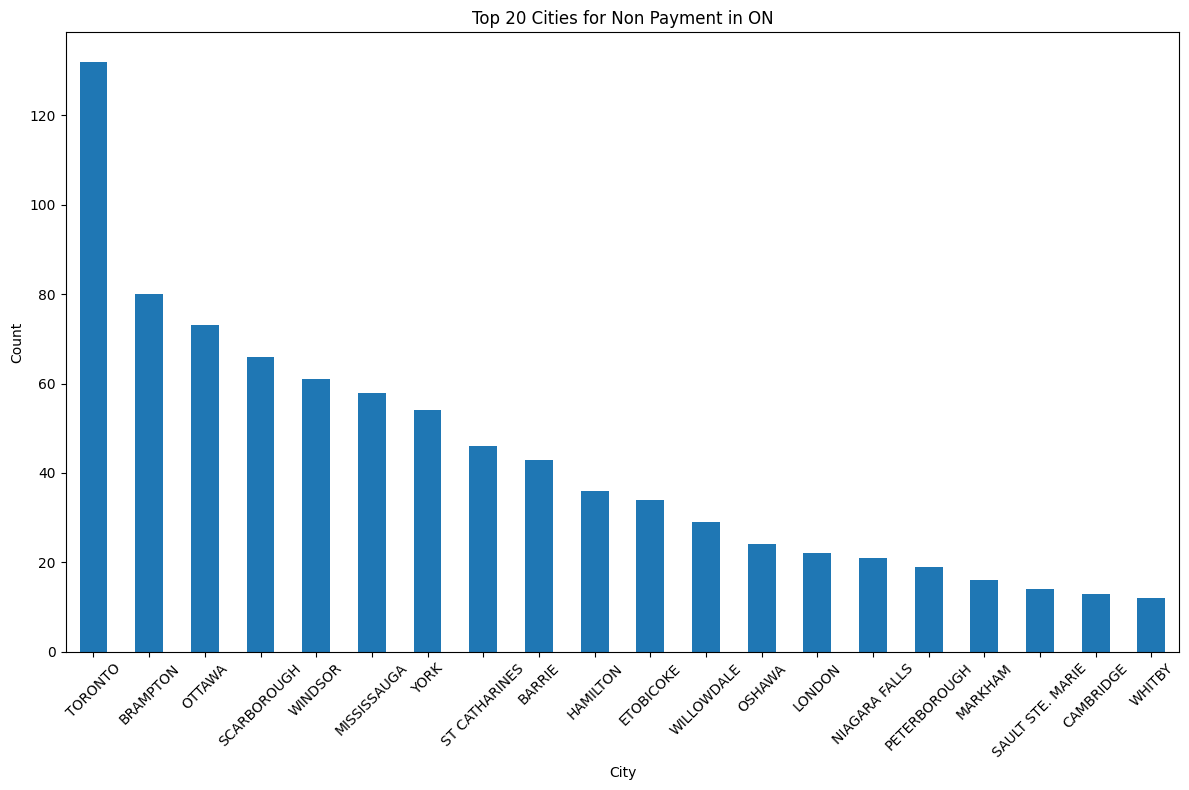

In [4]:
province_filter = "ON"  # Replace with the province you want to filter
filtered_df = df[df['province_at_activation'].str.strip() == province_filter]

# Filter for 'Non Payment' status
non_payment_df = filtered_df[filtered_df['DCP_drop_status'] == 'Non Payment']

# Count occurrences of 'Non Payment' by city and sort in descending order
city_counts = non_payment_df['city_at_activation'].value_counts()

# Select the top 10 cities
top_10_cities = city_counts.head(20)

# Plotting the bar chart
top_10_cities.plot(kind='bar', figsize=(12, 8))
plt.title(f'Top 20 Cities for Non Payment in {province_filter}')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
#lets run a PCA
df['target'] = (df['DCP_drop_status'] == 'Successful Completion').astype(int)
y = df['target']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   id                                           3123 non-null   int64         
 1   DCP_activation_date                          3123 non-null   datetime64[ns]
 2   DCP_start_date                               3123 non-null   datetime64[ns]
 3   duration_of_dcp                              3123 non-null   int64         
 4   DCP_drop_date                                3123 non-null   datetime64[ns]
 5   DCP_drop_status                              3123 non-null   object        
 6   age_at_activation                            3123 non-null   int64         
 7   dependents_at_activation                     3123 non-null   int64         
 8   number_in_household_at_activation            3123 non-null   int64         
 9

In [6]:
#predictors
df_predictors = df.drop(['id', 'DCP_activation_date', 'DCP_start_date','DCP_drop_date','DCP_drop_status','postal_prefix_at_activation','city_at_activation','province_at_activation','duration_of_dcp'], axis=1)

# Standardize predictors
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_predictors)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Proportion of Variance:", explained_variance_ratio)

Proportion of Variance: [0.24699914 0.10796426 0.06159307 0.05277022 0.05180019 0.04272822
 0.03884478 0.03172617 0.03088362 0.02901668 0.02815193 0.02742926
 0.02723258 0.02453009 0.02236449 0.02077964 0.01919499 0.01534135
 0.01362688 0.01306572 0.01155388 0.01014435 0.00928528 0.00881622
 0.00772385 0.00742095 0.00628514 0.00599127 0.00514617 0.00425768
 0.00373892 0.00359178 0.00328949 0.00317998 0.00254217 0.00059001
 0.00039957 0.        ]


In [8]:
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.24699914 0.3549634  0.41655647 0.46932669 0.52112688 0.5638551
 0.60269989 0.63442606 0.66530968 0.69432636 0.72247829 0.74990754
 0.77714013 0.80167022 0.8240347  0.84481434 0.86400933 0.87935068
 0.89297755 0.90604328 0.91759716 0.92774151 0.9370268  0.94584301
 0.95356686 0.96098781 0.96727295 0.97326422 0.97841039 0.98266807
 0.986407   0.98999877 0.99328827 0.99646825 0.99901041 0.99960043
 1.         1.        ]


In [ ]:
num_pcs = len(explained_variance_ratio)
print("Number of Principal Components:", num_pcs)
print(f"PC1 explains {explained_variance_ratio[0]*100:.2f}% of the total variance.")
print(f"The first 3 PC's explain {cumulative_explained_variance[2]*100:.2f}% of the variance.")

Number of Principal Components: 38
PC1 explains 24.70% of the total variance.
The first 3 PC's explain 41.66% of the variance.


In [10]:
# Check the names of the components
component_names = [f"PC{i+1}" for i in range(num_pcs)]
print("Names of the Principal Components:", component_names)

# Check the loadings (weights) of all Principal Components
principal_component_loadings = pca.components_
print("Loadings of all Principal Components:")
print(pd.DataFrame(principal_component_loadings, columns=df_predictors.columns, index=component_names))

Names of the Principal Components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38']
Loadings of all Principal Components:
      age_at_activation  dependents_at_activation  \
PC1            0.045812             -8.500580e-03   
PC2            0.125335              2.350345e-01   
PC3            0.403417             -3.843358e-02   
PC4           -0.274611              4.000870e-01   
PC5           -0.012671              8.884061e-02   
PC6            0.157487              2.775225e-01   
PC7           -0.211843              1.079135e-02   
PC8           -0.066886             -1.006476e-01   
PC9            0.009263              1.141497e-02   
PC10          -0.041358             -3.984926e-02   
PC11           0.001146             -4.011902e-0

In [11]:
transformed_data = pca.transform(df_scaled)
print("Loadings of all samples:")
print(pd.DataFrame(transformed_data, columns=component_names))

Loadings of all samples:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.114387  1.437127 -0.158004 -1.362078 -1.287037  0.987914  0.594135   
1     1.073898  0.385565  2.308287  0.024139 -1.161406 -1.567516 -0.342401   
2     2.650079  0.520128 -0.507956 -0.506976  2.434384  0.169713  0.681116   
3    -0.529713  3.359332 -2.286264  0.197092  1.592844  2.755566  0.132638   
4    -3.433096  0.557790  0.207007  1.926134  2.209327  0.388659  1.377695   
...        ...       ...       ...       ...       ...       ...       ...   
3118 -5.361462  1.655990 -0.267326  0.445910 -0.538660  1.864704  1.068492   
3119 -5.118441  0.526456  2.276266 -0.151796  0.412727 -0.206816 -1.111802   
3120 -5.477936 -1.923723 -0.086949 -0.135956 -1.569844  0.224512  1.278273   
3121 -5.594430 -0.781101 -1.519807 -1.939766  0.143266  0.010582  0.818045   
3122 -5.610549  0.491376 -1.925016 -2.166491  0.721010  0.009487  0.878869   

           PC8       PC9      PC10  ..

In [12]:
variance_of_components = pca.explained_variance_
print(variance_of_components)

[9.38897355 4.10395612 2.34128654 2.0059105  1.96903786 1.62419237
 1.47657458 1.20598062 1.17395363 1.10298698 1.07011596 1.04264556
 1.0351697  0.9324419  0.85012268 0.78987923 0.72964317 0.58315792
 0.51798716 0.49665655 0.43918824 0.38560885 0.35295377 0.33512356
 0.2936004  0.28208634 0.23891184 0.22774109 0.19561725 0.16184358
 0.14212465 0.13653126 0.12504073 0.1208779  0.09663338 0.02242771
 0.01518858 0.        ]


In [13]:
variance_explained = variance_of_components / sum(variance_of_components)
print(variance_explained)

[0.24699914 0.10796426 0.06159307 0.05277022 0.05180019 0.04272822
 0.03884478 0.03172617 0.03088362 0.02901668 0.02815193 0.02742926
 0.02723258 0.02453009 0.02236449 0.02077964 0.01919499 0.01534135
 0.01362688 0.01306572 0.01155388 0.01014435 0.00928528 0.00881622
 0.00772385 0.00742095 0.00628514 0.00599127 0.00514617 0.00425768
 0.00373892 0.00359178 0.00328949 0.00317998 0.00254217 0.00059001
 0.00039957 0.        ]


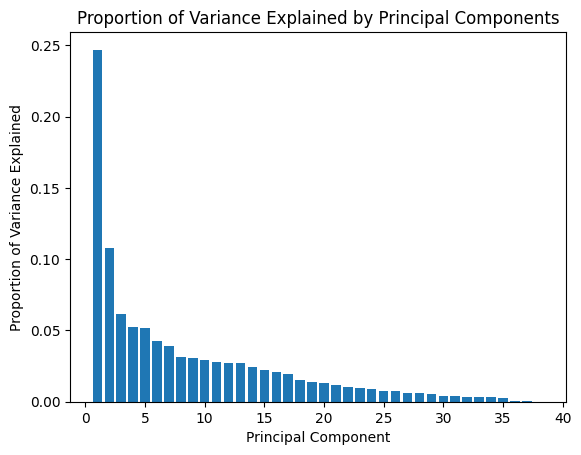

In [14]:
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Principal Components')
plt.show()

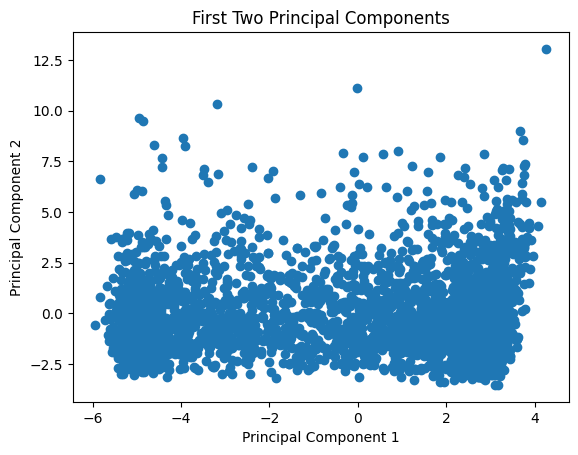

In [15]:
# Plot first two principal components
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components')
plt.show()

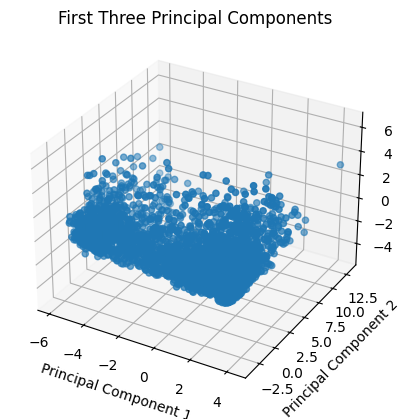

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('First Three Principal Components')
plt.show()

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

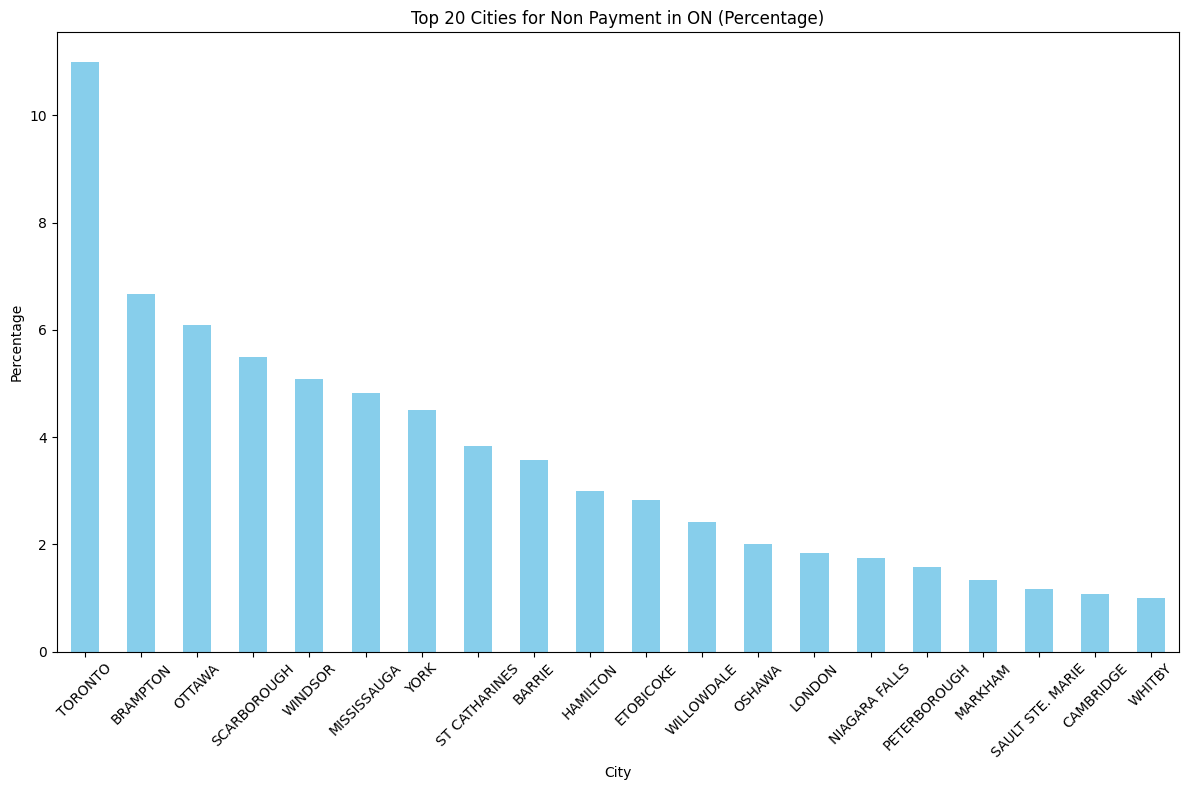

In [18]:
province_filter = "ON"  # Replace with the province you want to filter
filtered_df = df[df['province_at_activation'].str.strip() == province_filter]

# Filter for 'Non Payment' status
non_payment_df = filtered_df[filtered_df['DCP_drop_status'] == 'Non Payment']

# Count occurrences of 'Non Payment' by city and sort in descending order
city_counts = non_payment_df['city_at_activation'].value_counts()

# Calculate percentages
city_percentages = (city_counts / city_counts.sum()) * 100

# Select the top 20 cities by percentage
top_20_cities = city_percentages.head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_20_cities.plot(kind='bar', color='skyblue')

plt.title(f'Top 20 Cities for Non Payment in {province_filter} (Percentage)')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



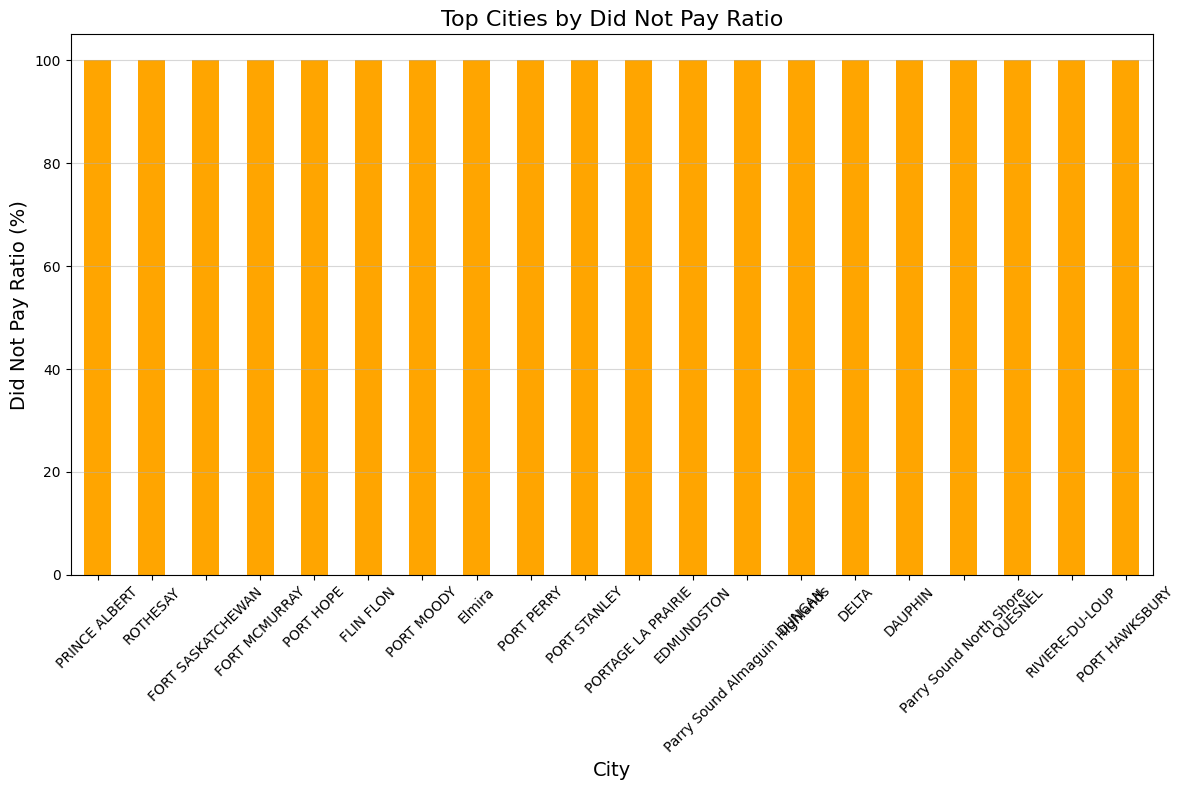

In [19]:
import matplotlib.pyplot as plt

# Calculate the total counts of all cases per city
total_cases_by_city = df['city_at_activation'].value_counts()

# Filter for 'Non Payment' cases and count them by city
non_payment_by_city = df[df['DCP_drop_status'] == 'Non Payment']['city_at_activation'].value_counts()

# Calculate the "Did Not Pay" ratio for each city
did_not_pay_ratio = (non_payment_by_city / total_cases_by_city) * 100

# Drop NaN values (if any cities have no "Non Payment" cases)
did_not_pay_ratio = did_not_pay_ratio.dropna()

# Sort the cities by "Did Not Pay" ratio in descending order
did_not_pay_ratio = did_not_pay_ratio.sort_values(ascending=False)

# Select the top cities (e.g., top 20)
top_cities_by_ratio = did_not_pay_ratio.head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_cities_by_ratio.plot(kind='bar', color='orange')

plt.title('Top Cities by Did Not Pay Ratio', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Did Not Pay Ratio (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


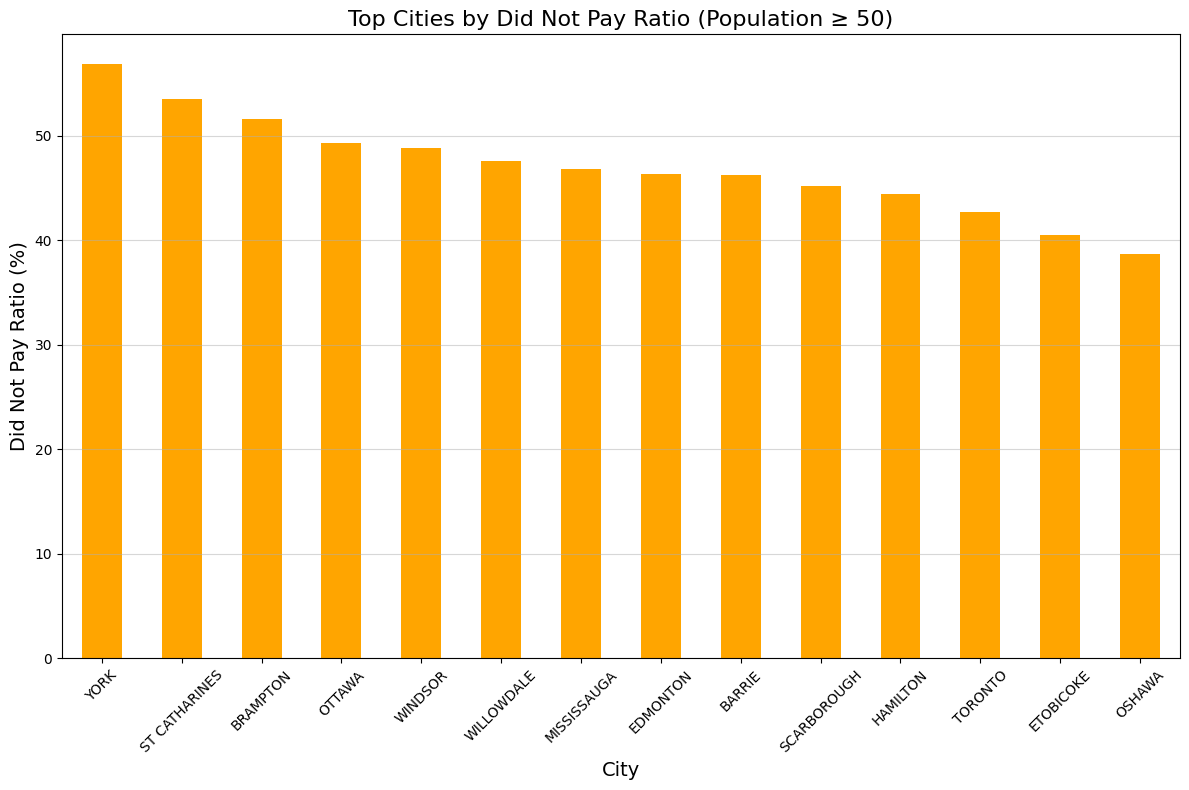

In [20]:
import matplotlib.pyplot as plt

# Calculate the total counts of all cases per city
total_cases_by_city = df['city_at_activation'].value_counts()

# Filter cities with a total population of 50 or more
filtered_cities = total_cases_by_city[total_cases_by_city >= 50]

# Filter for 'Non Payment' cases and count them by city
non_payment_by_city = df[df['DCP_drop_status'] == 'Non Payment']['city_at_activation'].value_counts()

# Retain only the cities with population ≥ 50 in the non-payment data
non_payment_by_city = non_payment_by_city[filtered_cities.index]

# Calculate the "Did Not Pay" ratio for each city
did_not_pay_ratio = (non_payment_by_city / filtered_cities) * 100

# Drop NaN values (if any cities have no "Non Payment" cases)
did_not_pay_ratio = did_not_pay_ratio.dropna()

# Sort the cities by "Did Not Pay" ratio in descending order
did_not_pay_ratio = did_not_pay_ratio.sort_values(ascending=False)

# Select the top cities (e.g., top 20)
top_cities_by_ratio = did_not_pay_ratio.head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_cities_by_ratio.plot(kind='bar', color='orange')

plt.title('Top Cities by Did Not Pay Ratio (Population ≥ 50)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Did Not Pay Ratio (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


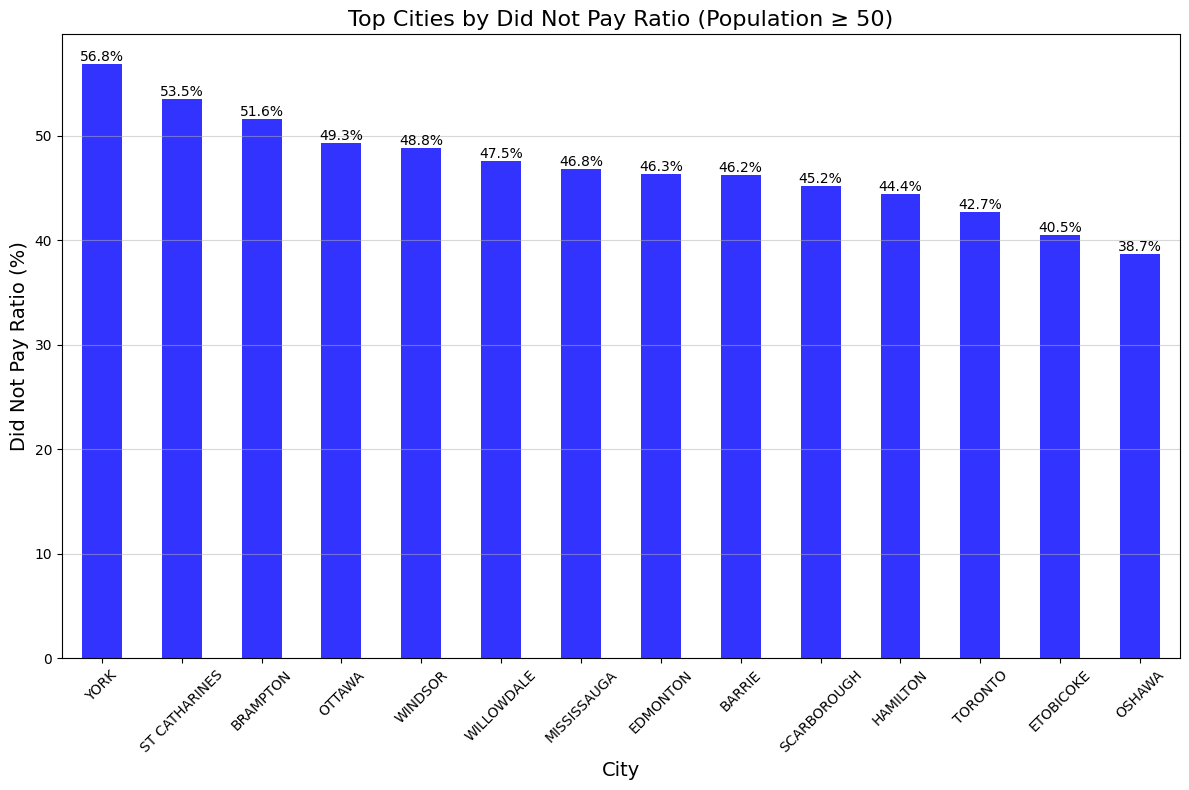

In [21]:
import matplotlib.pyplot as plt

# Calculate the total counts of all cases per city
total_cases_by_city = df['city_at_activation'].value_counts()

# Filter cities with a total population of 50 or more
filtered_cities = total_cases_by_city[total_cases_by_city >= 50]

# Filter for 'Non Payment' cases and count them by city
non_payment_by_city = df[df['DCP_drop_status'] == 'Non Payment']['city_at_activation'].value_counts()

# Retain only the cities with population ≥ 50 in the non-payment data
non_payment_by_city = non_payment_by_city[filtered_cities.index]

# Calculate the "Did Not Pay" ratio for each city
did_not_pay_ratio = (non_payment_by_city / filtered_cities) * 100

# Drop NaN values (if any cities have no "Non Payment" cases)
did_not_pay_ratio = did_not_pay_ratio.dropna()

# Sort the cities by "Did Not Pay" ratio in descending order
did_not_pay_ratio = did_not_pay_ratio.sort_values(ascending=False)

# Select the top cities (e.g., top 20)
top_cities_by_ratio = did_not_pay_ratio.head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
bars = top_cities_by_ratio.plot(kind='bar', color='blue', alpha=0.8)

plt.title('Top Cities by Did Not Pay Ratio (Population ≥ 50)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Did Not Pay Ratio (%)', fontsize=14)
plt.xticks(rotation=45)

# Annotate the bars with percentages
for bar in bars.patches:
    bar_value = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar_value,  # Y position
        f'{bar_value:.1f}%',  # Text (formatted to 1 decimal place)
        ha='center',  # Center the text horizontally
        va='bottom',  # Position text slightly above the bar
        fontsize=10
    )

# Add grid and layout adjustments
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
